<a href="https://www.kaggle.com/code/aicortex/ideal-learning-rate-for-fashion-mnist?scriptVersionId=208970739" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#e8efff;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
📊 Exploring the Ideal Learning Rate for Fashion MNIST 🧥👖👗</h1></></center>     

</div>

<center style="font-family:cursive; font-size:18px; color:#eb4634;">This notebook focuses on a crucial aspect of deep learning: finding the optimal learning rate for training a neural network. The learning rate is a key hyperparameter that significantly affects the model's performance and training efficiency. Choosing an ideal value ensures faster convergence and prevents underfitting or overfitting.</center>

## 🗂️ Notebook Contents:
- **Data Preparation**:  
   The `Fashion MNIST` dataset is loaded and preprocessed to prepare it for training. This dataset contains 28x28 grayscale images of 10 clothing categories like T-shirts, trousers, dresses, and more. 🛍️
   
- **Model Building**:  
   A deep learning model is constructed using TensorFlow and Keras. The architecture is simple yet effective for our goal.

- **Learning Rate Exploration**:  
   Different learning rates are experimented with to observe their effects on loss values. Visualization is a key part of understanding this process. 📈

- **Training and Evaluation**:  
   The model is trained using the best learning rate identified, and its performance is evaluated on the test set. Metrics like accuracy and loss are logged.

- **Confusion Matrix Analysis**:  
   A confusion matrix is generated to analyze the model's predictions. This step helps understand where the model performs well and where it struggles.

- **Final Observations and Insights**:  
   Based on the results, the notebook provides insights into how the learning rate impacts model training and what values work best for this dataset.

👩‍💻 **Purpose of the Notebook**:  
To understand the importance of selecting an ideal learning rate, practice hyperparameter tuning, and visualize how it impacts training dynamics. By the end, you'll gain a deeper understanding of how to improve model performance efficiently.


In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import random

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Loading the Dataset



## 🛍️ What does this code do?  
1. **Load the Dataset**:  
   This line loads the `Fashion MNIST` dataset using TensorFlow's `fashion_mnist.load_data()` method.  
   - If the dataset is not already available locally, it downloads it from TensorFlow's servers.

2. **Structure**:  
   - The dataset contains grayscale images of clothing items belonging to 10 classes. Each image has a size of 28x28 pixels.
   - Classes include categories like T-shirt/top, Trouser, Pullover, and more.

3. **Output**:  
   - Once loaded, the dataset is ready for preprocessing and splitting into training and testing sets.


In [2]:
data = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# 2️⃣ Splitting and Inspecting the Dataset

## 🔍 What does this code do?  
1. **Split the Data**:  
   - The loaded data is unpacked into four variables:
     - `train_data`: The images for training.
     - `train_label`: Labels corresponding to the training images.
     - `test_data`: The images for testing.
     - `test_label`: Labels corresponding to the testing images.

2. **Check the Shapes**:  
   - Training Data Shape: `(60000, 28, 28)`  
     This indicates 60,000 grayscale images of size 28x28 for training.  
   - Training Labels Shape: `(60000,)`  
     Each image is associated with one label.  
   - Testing Data Shape: `(10000, 28, 28)`  
     This indicates 10,000 grayscale images of size 28x28 for testing.  
   - Testing Labels Shape: `(10000,)`  
     Each testing image has a corresponding label.

## ✨ Why is this important?  
- Understanding the shape and dimensions of the dataset ensures that we can properly configure our model's input and output layers.  
- It also helps confirm that the data is correctly split into training and testing sets. ✅

In [3]:
(train_data, train_label), (test_data, test_label) = data
(train_data.shape, train_label.shape), (test_data.shape, test_label.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

# 3️⃣ Visualizing the Dataset 🖼️✨

This code is just to **get a feel for the data**! By randomly picking and plotting some images, we can see what kind of items (like T-shirts, shoes, or bags) we're working with. It's not necessary for training, but it helps us connect with the dataset visually. Cool, right? 😎👕👜👟

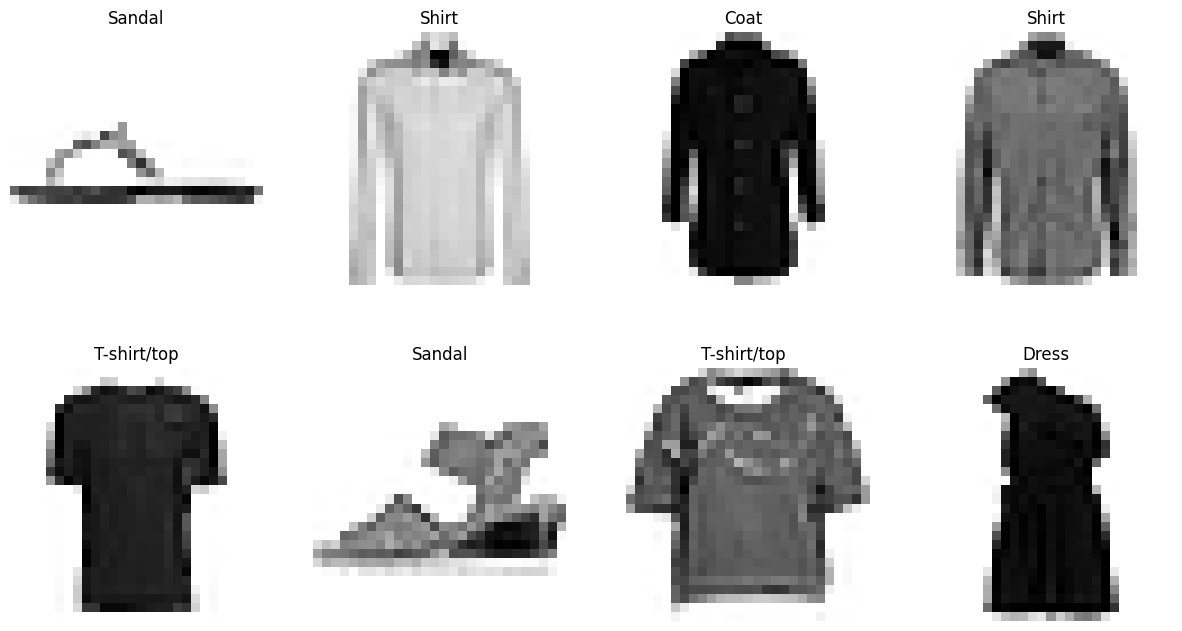

In [4]:
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
seq = range(len(train_data))
plt.figure(figsize=(15, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    index = random.choice(seq)
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(str(label_name[train_label[index]]))
    plt.axis(False)


# 4️⃣ Building a Simple Model to Test Learning Rates 🧪⚡

Here, we're creating a **simplified version of the final model** to experiment with different learning rates. The idea is to:
- Keep the model architecture similar to the final one.
- Use fewer neurons per layer so the model trains **faster** during the 50 epochs.  
This is especially useful when trying to find the optimal learning rate, as it saves us time without compromising the experiment's effectiveness. ⏱️💡

---

### 🌟 Advantages:
- **Faster Training**: By reducing the number of neurons, we minimize the computational load. 🚀  
- **Same Structure**: It mirrors the final architecture, so the insights from this experiment will apply directly to the larger model. 🔄

---

### ⚠️ Disadvantages:
- **Limited Capacity**: With fewer neurons, the model might not learn complex patterns well. 🤔  
- **Not Final Results**: This is just for testing; the performance may vary when using the full model. 🎛️

---

The key takeaway? **Quick experimentation = smarter optimization!** 🎯✨


In [5]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28), name='input'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(units=10, activation='relu', name='hidden_1'),
    tf.keras.layers.Dense(units=10, activation='relu', name='hidden_2'),
    tf.keras.layers.Dense(units=10, activation='relu', name='hidden_3'),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax, name='output'),   
], name='model')

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
             )

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model.fit(train_data, train_label, epochs=50,
         validation_data=(test_data, test_label),
        callbacks=[lr_scheduler])


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.0022 - sparse_categorical_accuracy: 0.1480 - val_loss: 2.0275 - val_sparse_categorical_accuracy: 0.2164 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.9857 - sparse_categorical_accuracy: 0.2314 - val_loss: 1.6738 - val_sparse_categorical_accuracy: 0.3323 - learning_rate: 1.1220e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.5901 - sparse_categorical_accuracy: 0.3371 - val_loss: 1.3900 - val_sparse_categorical_accuracy: 0.3846 - learning_rate: 1.2589e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.3210 - sparse_categorical_accuracy: 0.4157 - val_loss: 1.1986 - val_sparse_categorical_accuracy: 0.4940 - learning_rate: 1.4125e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.1611 - sparse_categorical_accuracy: 0.5094 - val_loss: 1.1137 - val_sparse_categorical_accuracy: 0.5238 - learning_rate: 1.5849e-04
Epoch 6/50
1875/1875

# 5️⃣ Plotting Learning Rate vs. Loss 📉⚡

### Step-by-Step:

1. **X-axis (Learning Rate)**:  
   We varied the learning rate exponentially from $(10^{-4})$ to $(10^{-2})$.

2. **Y-axis (Loss)**:  
   This shows how the loss changes with different learning rates.

3. **Optimal Point**:  
   - The **ideal learning rate** is typically found **just before** the loss starts to increase sharply.
   - In this plot, the loss decreases until around $(10^{-3})$ and then starts to rise.
   - Therefore, a learning rate slightly **before** $(10^{-3})$, such as $(10^{-3.5})$ or $(3 \times 10^{-4})$, is often optimal.

### Why is this important?  
Choosing the optimal learning rate ensures the model learns efficiently without overshooting or converging too slowly. 🚀✨

**Note**: It's advisable to select a learning rate where the loss is decreasing and hasn't started to increase, indicating the model is learning effectively without instability. ([walkwithfastai.com](https://walkwithfastai.com/lr_finder))


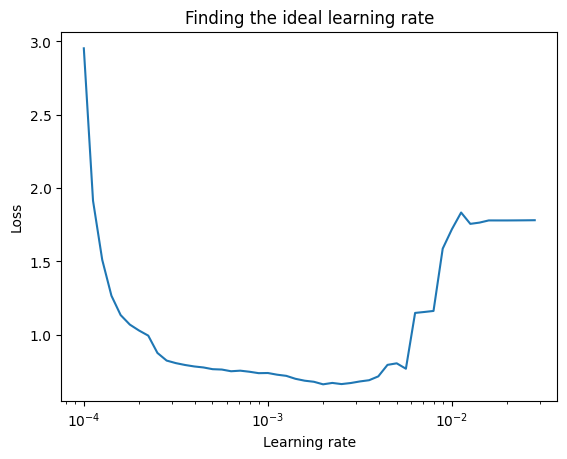

In [6]:
lr = 1e-4 * 10**(np.arange(50)/20)
plt.semilogx(lr, history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

# 6️⃣ Visualizing Training Progress 📊✨

### What does this plot show?  
This plot visualizes key metrics over 50 epochs, giving us a detailed view of the model's training and validation performance:

1. **Blue Line (Loss)**:  
   - Tracks how the training loss decreases over time.
   - A steady decrease shows the model is learning.  
   - Any sudden jumps might indicate instability.

2. **Green Line (Validation Loss)**:  
   - Tracks the loss on validation data.
   - The goal is for this to follow a similar trend to training loss. If it diverges significantly, it could mean overfitting.  

3. **Orange Line (Sparse Categorical Accuracy)**:  
   - Tracks the training accuracy improving as the model learns.

4. **Red Line (Validation Accuracy)**:  
   - Tracks how well the model generalizes to unseen data.

5. **Purple Line (Learning Rate)**:  
   - Indicates the learning rate used during each epoch.

### Key Observations:  
- The training and validation loss decrease initially, which is a good sign.  
- Validation accuracy stabilizes, showing the learning rate strategy worked well.  
- If the validation loss starts to increase while accuracy stagnates, it may suggest **overfitting**. Keep an eye on this trend! 👀

### Why is this important?  
This combined view lets us evaluate both **learning efficiency** and **generalization performance** in one glance, helping fine-tune the model and hyperparameters effectively. 🚀📈


<Axes: >

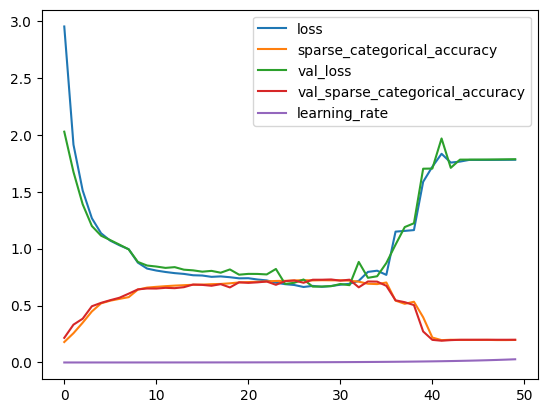

In [7]:
pd.DataFrame(history.history).plot()

# 7️⃣ Building the Final Model 🛠️🧠

### What's happening here?  
1. **Model Structure**:  
   - This is the **final model**, built with more complex architecture compared to the initial one.  
   - It has:
     - **Two hidden layers** with 128 neurons each.
     - **One smaller hidden layer** with 64 neurons.
     - An output layer with 10 neurons (for 10 classes).

2. **Activation Functions**:  
   - **ReLU** is used in hidden layers for non-linearity and efficient training.
   - **Softmax** in the output layer ensures the output is a probability distribution.

3. **Compilation**:  
   - **Loss**: Sparse Categorical Crossentropy for multi-class classification.
   - **Optimizer**: Adam for efficient gradient-based optimization.
   - **Metrics**: Sparse Categorical Accuracy to track training progress.

4. **Visualization**:  
   - `model.summary()` provides a detailed textual view of the model's architecture.  
   - `plot_model()` generates a visual diagram showing layers, shapes, and activations. 🎨

---

### Why is this important?  
This model is **designed for better performance** compared to the simpler model. It uses more neurons to capture complex patterns in the data, making it suitable for final training and evaluation. 🚀✨


Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,898 (491.79 KB)

 Trainable params: 125,898 (491.79 KB)

 Non-trainable params: 0 (0.00 B)

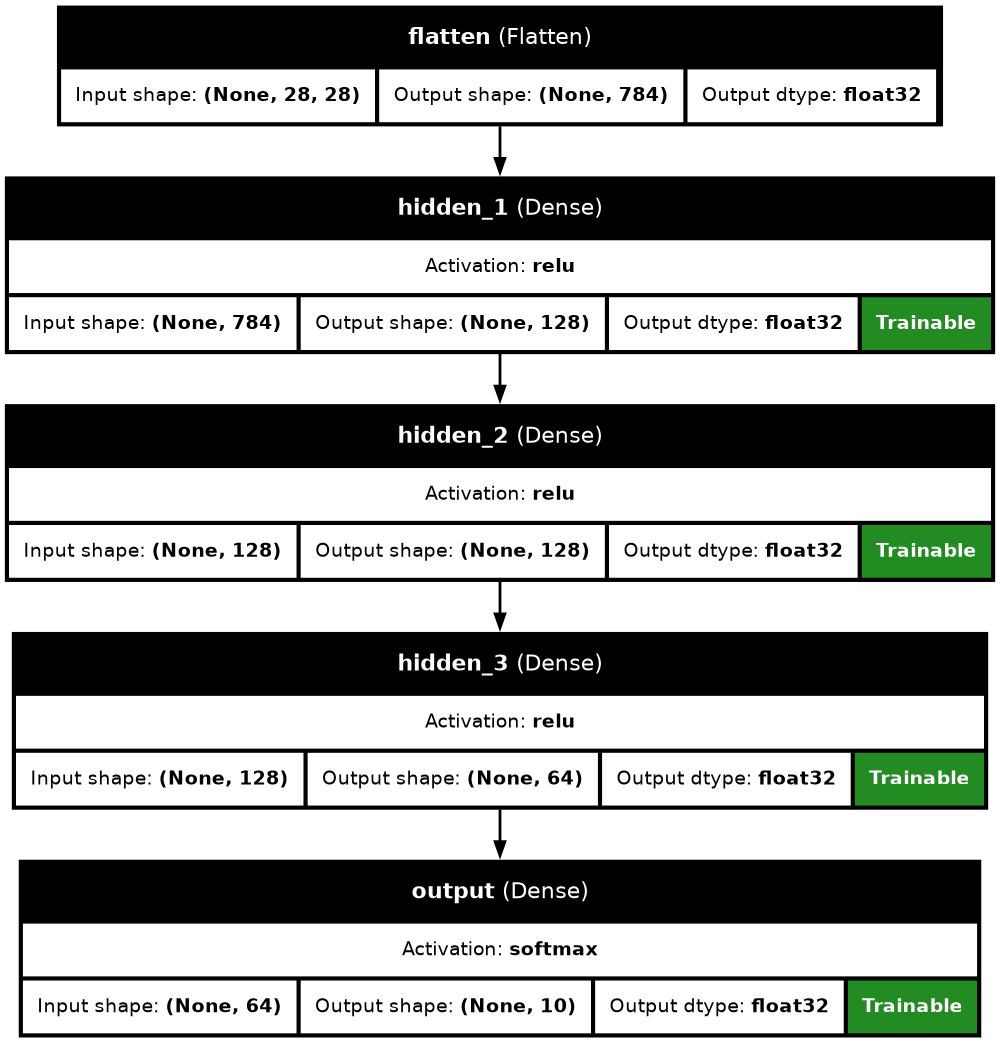

In [8]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28), name='input'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(units=128, activation='relu', name='hidden_1'),
    tf.keras.layers.Dense(units=128, activation='relu', name='hidden_2'),
    tf.keras.layers.Dense(units=64, activation='relu', name='hidden_3'),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax, name='output'),   
], name='model_2')

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
             )

model_2.summary()
plot_model(model_2, show_shapes=True, show_dtype=True, show_layer_names=True,
           expand_nested=True, dpi=100, show_layer_activations=True,show_trainable=True,)



# 8️⃣ Training, Evaluation, and Predictions 🚀📊


### 1️⃣ Training the Model

- The model is trained for **10 epochs** with a **15% validation split**.
- **Key Observations**:
  - Training accuracy improves steadily across epochs.
  - Validation loss and accuracy also improve, indicating good generalization.


In [9]:
history = model_2.fit(train_data, train_label, epochs=10,
         validation_split=0.15)

Epoch 1/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.1123 - sparse_categorical_accuracy: 0.6888 - val_loss: 0.6343 - val_sparse_categorical_accuracy: 0.8087
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5133 - sparse_categorical_accuracy: 0.8196 - val_loss: 0.5240 - val_sparse_categorical_accuracy: 0.8269
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4493 - sparse_categorical_accuracy: 0.8379 - val_loss: 0.4657 - val_sparse_categorical_accuracy: 0.8406
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4177 - sparse_categorical_accuracy: 0.8518 - val_loss: 0.4472 - val_sparse_categorical_accuracy: 0.8419
Epoch 5/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4000 - sparse_categorical_accuracy: 0.8557 - val_loss: 0.4369 - val_sparse_categorical_accuracy: 0.8520
Epoch 6/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3835 - sparse_categorical_accuracy: 0.8624 - val_loss: 0.4485 - val_sparse_categorical_accuracy:

### 2️⃣ Evaluating the Model

- **Loss**: 0.4345  
- **Accuracy**: 84.83%  
- The evaluation shows that the model performs reasonably well on unseen test data. ✅


In [10]:
model_2.evaluate(test_data, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4345 - sparse_categorical_accuracy: 0.8544


[0.4483790397644043, 0.8543000221252441]

### 3️⃣ Making Predictions

- **Shape of Predictions**: `(10000, 10)`  
  - Each row represents the probabilities for the 10 classes.  
- **Argmax**: Picks the class with the highest probability for each input.


In [11]:
prob = model_2.predict(test_data)
print('shape : ', prob.shape)
print(prob)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
shape :  (10000, 10)
[[3.7373444e-15 2.7687785e-12 1.4466884e-18 ... 4.6100553e-02
  1.0613091e-06 9.3844306e-01]
 [1.7480255e-04 5.1518935e-13 9.9371707e-01 ... 3.3614904e-26
  3.8983139e-06 1.6092635e-21]
 [1.4298548e-14 9.9999994e-01 4.8732569e-16 ... 0.0000000e+00
  7.3709570e-29 0.0000000e+00]
 ...
 [2.7221776e-04 2.0209173e-12 2.4748872e-05 ... 4.0308364e-06
  9.9962217e-01 3.1171143e-07]
 [7.0914624e-08 9.9999899e-01 1.2315477e-08 ... 8.0124349e-26
  1.3042793e-15 6.6582565e-30]
 [1.4051376e-08 6.7660314e-15 3.0552266e-11 ... 7.1484355e-05
  3.5556732e-07 4.4303579e-06]]


# 9️⃣ Confusion Matrix Analysis 🎯📊

### What does this show?  
The **confusion matrix** provides a detailed breakdown of the model's predictions vs. actual labels. It helps us understand where the model performs well and where it struggles.

---

### Key Insights:
1. **Diagonal Values**:  
   - These represent correctly classifiedT-shirts).  
   - Higher diagonal values = better performance! ✅

2. **Off-Diagonal Values**:  
   - These indicate misclas Pullovers).  
   - Look for classes with high misclassification rates to identify where the model struggles.

3. **Class-Wise Performance**:  
   - For example, **Trousers** have 967 correct predictions and very few misclassifications, showing the model excels in this class. 👖  
   - However, **Pullovers** and **Dresses** show higher misclassification, which could mean similar features between those classes. 🧥👗

---

### Why use a confusion matrix?  
- It goes beyond simple accuracy by giving a **class-level performance breakdown**.  
- This helps identify which classes need more attention (e.g., better preprocessing or more training data).  
- Visualizing it makes debugging and improvements easier! 🔍✨


In [12]:
pred = tf.argmax(prob, axis=1)
pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

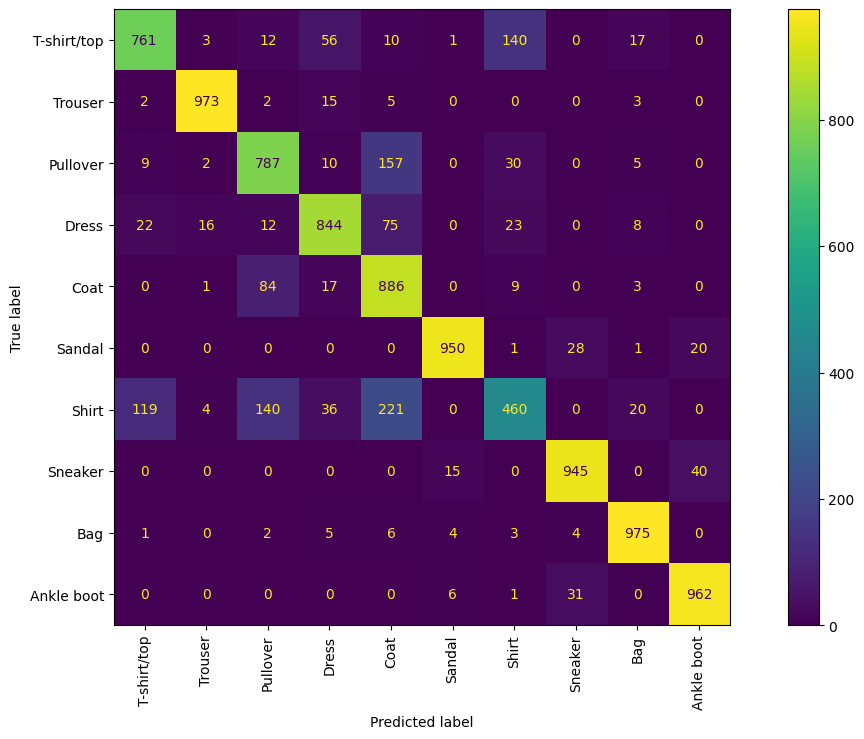

In [13]:
cm = confusion_matrix(test_label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_name)

fig, ax = plt.subplots(figsize=(15, 8))
disp.plot(ax=ax)

plt.xticks(rotation=90)

plt.show()

# 🔟 Final Thoughts on the Model 🧠✨

Well, it turns out that the **default learning rate** in the Adam optimizer was already working like a charm! 🎩✨ Maybe Adam really knows what's best, huh? 😂 But hey, testing learning rates wasn’t a waste—we confirmed what works and learned something along the way. Knowledge is power, right? 💪

---

### The Verdict:  
This model did **great** for this notebook! 🏆 It performed well on most classes and gave us a solid foundation. But let’s not fool ourselves—it’s not the ultimate solution. There’s always room for improvement, whether that’s tweaking the architecture, adding more data, or experimenting with new ideas. 🚀

---

### What’s Next?  
In the **next notebook**, we’ll dive deeper into **more advanced optimizations** and test some new tricks to push this model to its limits. Stay curious and excited for what’s to come! 😎✨

---

### If You Found This Helpful…  
Feel free to **upvote** 👍 and share your thoughts or questions! I’d love to hear your feedback, and maybe we can collaborate on even cooler ideas. Let’s keep the learning alive! 🧑‍💻🌟
